Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [29]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


### Ejercicio 1

Importa el csv "temps.csv"

In [10]:
df = pd.read_csv("./data/temps.csv")

print(df.info())

display(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB
None


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
201,2016,7,23,Sat,81,71,77.0,75,75,81,76,86
157,2016,6,9,Thurs,85,67,68.6,65,66,73,69,80
72,2016,3,16,Wed,49,51,53.7,53,52,54,55,65
239,2016,9,13,Tues,70,74,71.5,75,71,75,70,82
62,2016,3,6,Sun,57,64,52.2,60,52,53,51,49
125,2016,5,8,Sun,77,82,63.2,63,62,65,63,83
295,2016,11,9,Wed,63,71,52.4,65,48,56,52,42
197,2016,7,19,Tues,80,73,76.6,78,76,78,77,90
232,2016,9,6,Tues,68,68,73.3,68,73,76,75,79
107,2016,4,20,Wed,89,81,59.2,81,56,63,61,66


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [20]:
df_cod = pd.get_dummies(df, columns= ["week"], dtype = int)

In [21]:
display(df_cod)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


### Ejercicio 3

Divide en train y test

In [22]:
X = df_cod.drop(columns="actual")
y = df_cod["actual"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [23]:
print("X_train: ", X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train)
print("y_test: ",y_test)

X_train:  (278, 17)
X_test:  (70, 17)
y_train:  177    74
78     57
90     69
16     50
66     56
       ..
188    74
71     51
106    81
270    60
102    60
Name: actual, Length: 278, dtype: int64
y_test:  255    66
114    61
314    52
268    66
167    70
       ..
93     68
180    76
183    69
197    78
325    36
Name: actual, Length: 70, dtype: int64


### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [24]:
tree_regr = DecisionTreeRegressor(random_state=42)

In [25]:
tree_regr.fit(X_train, y_train)

y_pred = tree_regr.predict(X_test)

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [ ]:
errores = y_test - y_pred      # error (con signo)
errores_abs = np.abs(errores) # error absoluto
mae = np.mean(errores_abs)    # media
print(mae)

4.885714285714286


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [28]:
rel_errores = errores / y_test
rel_errores_abs = np.abs(rel_errores)
mape = np.mean(rel_errores_abs) * 100
print(mape)

7.703220475099386


### Ejercicio 7

Representa el árbol de decision

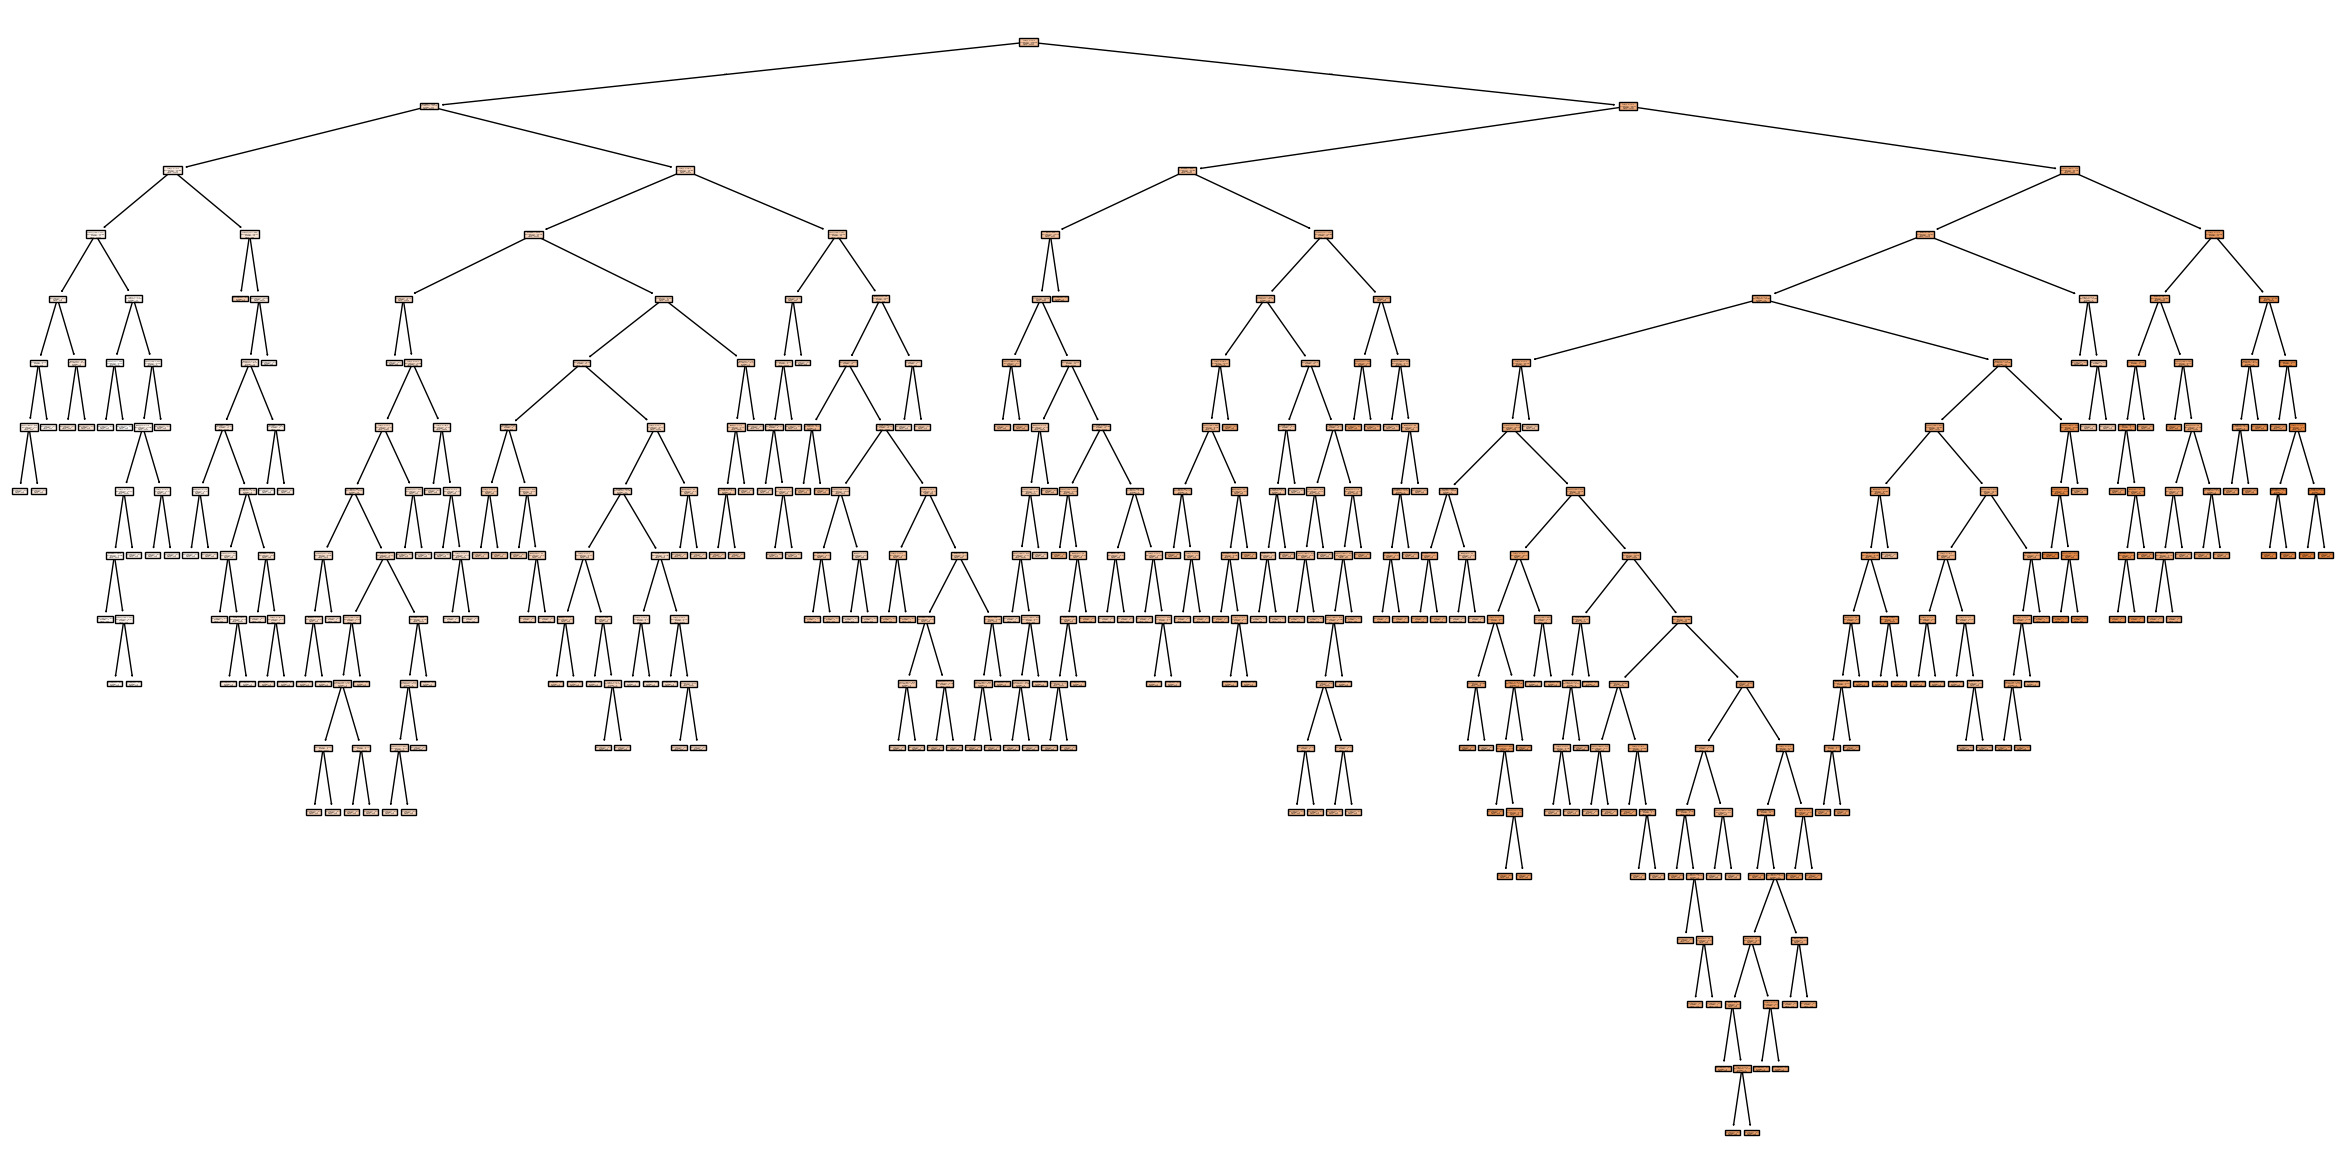

In [32]:
plt.figure(figsize=(30,15))
plot_tree(
    tree_regr,
    feature_names=X_train.columns,
    filled = True
)
plt.show()

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [33]:
tree_regr_depth3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regr_depth3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [36]:
y_pred = tree_regr_depth3.predict(X_test)

errores = y_test - y_pred
errores_abs = np.abs(errores)
mae = np.mean(errores_abs)

rel_errores = errores/y_test
rel_errores_abs = np.abs(rel_errores)
mape =  np.mean(rel_errores_abs) * 100

print("MAE: ", mae)
print("MAPE: ", mape)


MAE:  4.5567196265742504
MAPE:  7.147155657048517


### Ejercicio 10

Vuelve a representar su árbol

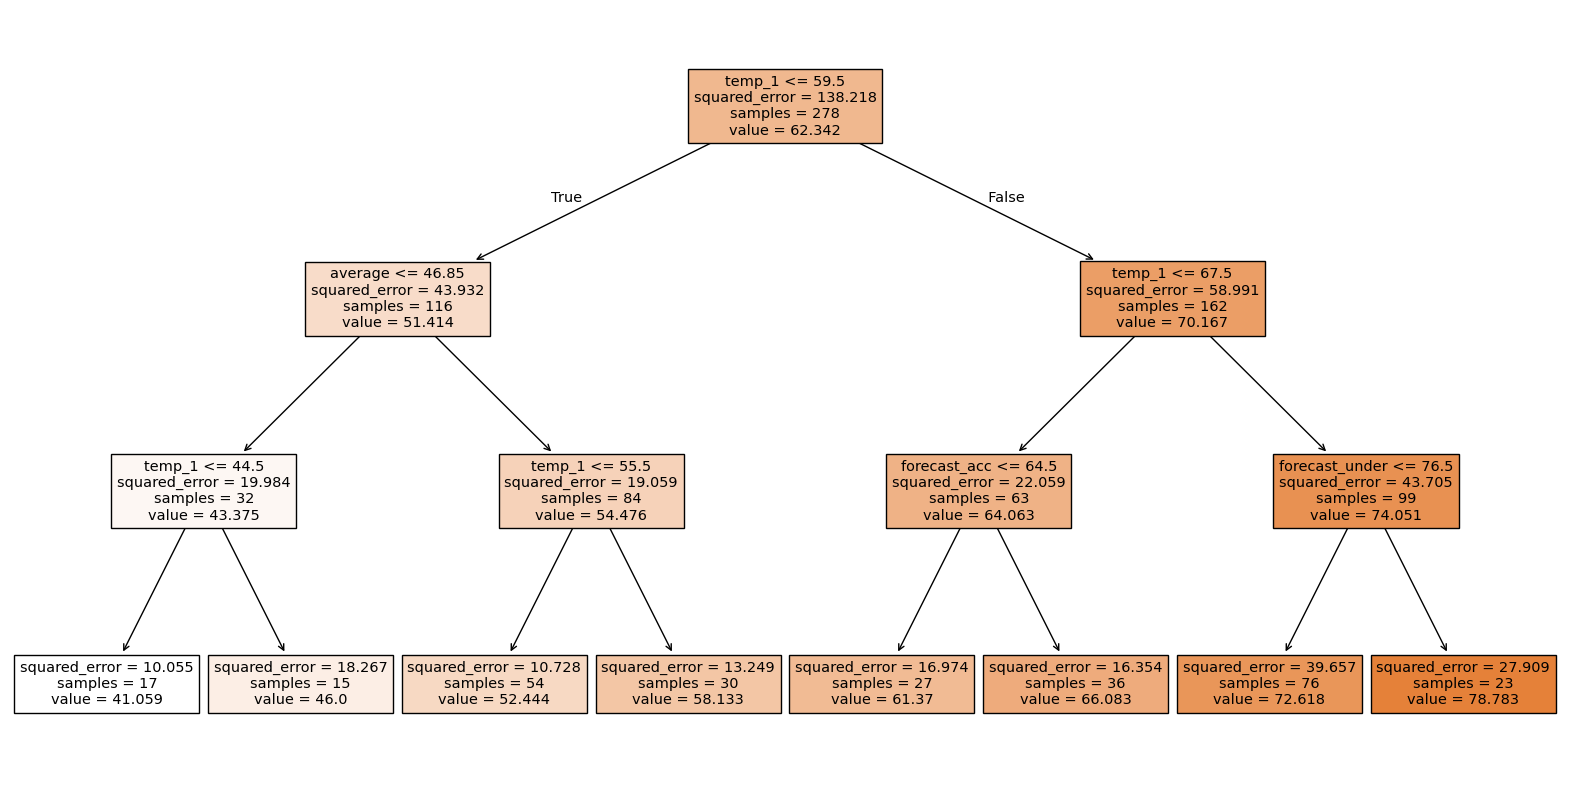

In [37]:
plt.figure(figsize= (20,10))
plot_tree(
    tree_regr_depth3,
    feature_names = X_train.columns,
    filled = True
)
plt.show()

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [ ]:
#Obtener las importancias del modelo
importances = tree_regr_depth3.feature_importances_


In [39]:
#Asociar importancias con nombres de variables
feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
})

In [40]:
#Ordenar de mayor a menor importancia
feature_importance_df = feature_importance_df.sort_values(
    by="importance",
    ascending=False
)

feature_importance_df

,feature,importance
4,temp_1,0.880208
5,average,0.088412
8,forecast_under,0.020771
7,forecast_acc,0.010610
0,year,0.000000
3,temp_2,0.000000
2,day,0.000000
1,month,0.000000
6,forecast_noaa,0.000000
9,friend,0.000000


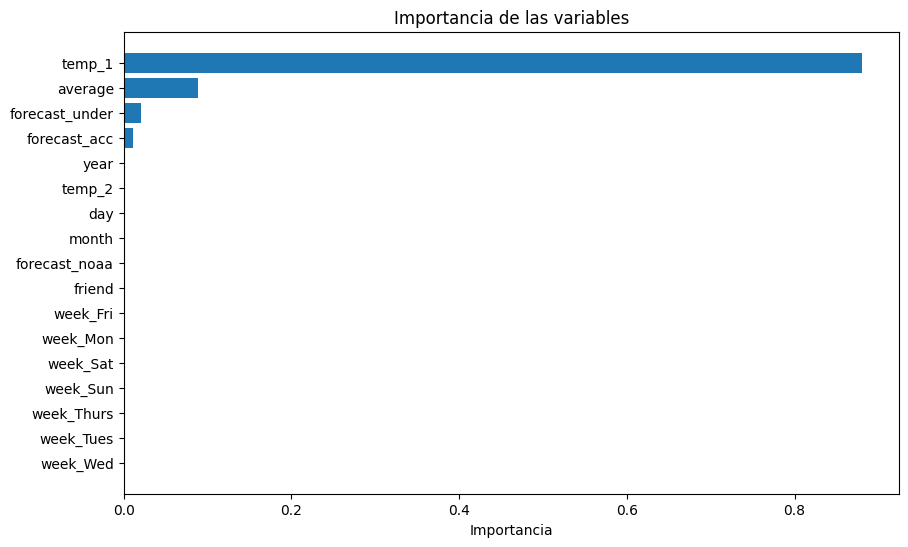

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["feature"],
    feature_importance_df["importance"]
)
plt.gca().invert_yaxis()
plt.xlabel("Importancia")
plt.title("Importancia de las variables")
plt.show()

temp_1, temp_2 y average son las variables más importantes
→ tiene sentido, son temperaturas históricas.

Variables como friend o los días de la semana tienen poca importancia
→ aportan poco poder predictivo.

El modelo basa la predicción principalmente en información histórica real, no en ruido.


---

# Visión general del problema

Estamos ante un **problema de regresión supervisada**:

* **Objetivo**: predecir la temperatura máxima real (`actual`)
* **Tipo de variable objetivo**: continua
* **Modelo**: Árbol de decisión para regresión (`DecisionTreeRegressor`)

El flujo sigue un **pipeline estándar de Machine Learning**.

---

## Ejercicio 0 – Importaciones

### Qué se hace

Se importan las librerías necesarias para:

* manipular datos
* entrenar el modelo
* evaluar resultados
* visualizar el árbol

### Cómo

Importando `pandas`, `numpy`, `sklearn`, `matplotlib`.

### Por qué

Un modelo no existe aislado:

* necesita datos estructurados
* métricas para evaluarse
* visualización para interpretarse

Este ejercicio asegura que sabes **qué herramientas forman parte del proceso**.

---

## Ejercicio 1 – Carga del dataset

### Qué se hace

Se carga el archivo `temps.csv` en un DataFrame.

### Cómo

Usando `pd.read_csv()`.

### Por qué

Antes de modelar hay que:

* entender los datos
* conocer las columnas
* detectar tipos de variables

Aquí se identifica claramente:

* el **target** (`actual`)
* las **features**

---

## Ejercicio 2 – One-Hot Encoding

### Qué se hace

Se transforma la variable categórica `week` en variables numéricas binarias.

### Cómo

Usando `pd.get_dummies()`.

### Por qué

Los árboles:

* **no entienden texto**
* pero **no necesitan escalado**

Si no se hace este paso:

* el modelo no puede entrenarse

Este ejercicio evalúa si entiendes el **preprocesado mínimo necesario**.

---

## Ejercicio 3 – Train / Test Split

### Qué se hace

Se separan los datos en:

* entrenamiento
* test

### Cómo

1. Separando `X` e `y`
2. Usando `train_test_split()`

### Por qué

Un modelo debe evaluarse con **datos que no ha visto**.

Si evalúas con train:

* el error es irreal
* no mides capacidad de generalización

Este ejercicio evita **data leakage**.

---

## Ejercicio 4 – Árbol con hiperparámetros por defecto

### Qué se hace

Se entrena un `DecisionTreeRegressor` sin limitar su complejidad.

### Cómo

```python
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
```

### Por qué

Este modelo sirve como **baseline**.

Un árbol sin restricciones:

* se adapta muy bien a train
* suele sobreajustar

Necesitas un punto de comparación para justificar mejoras posteriores.

---

## Ejercicio 5 – MAE sin sklearn

### Qué se hace

Se calcula el **Mean Absolute Error** manualmente.

### Cómo

Aplicando directamente la fórmula matemática.

### Por qué

El MAE:

* es fácil de interpretar
* mide error en unidades reales (grados)

No usar `sklearn` obliga a demostrar que:

* entiendes la métrica
* no la usas como “caja negra”

---

## Ejercicio 6 – MAPE sin sklearn

### Qué se hace

Se calcula el **Mean Absolute Percentage Error**.

### Cómo

Dividiendo el error por el valor real y sacando la media.

### Por qué

El MAPE:

* mide error **relativo**
* permite comparar errores independientemente de la escala

Complementa al MAE:

* MAE → error absoluto
* MAPE → error porcentual

---

## Ejercicio 7 – Representación del árbol completo

### Qué se hace

Se visualiza el árbol entrenado por defecto.

### Cómo

Con `plot_tree()`.

### Por qué

Este ejercicio demuestra visualmente que:

* el árbol es enorme
* es poco interpretable
* ha sobreajustado

No se espera que “se entienda”, se espera que **se vea el problema**.

---

## Ejercicio 8 – Árbol limitado (`max_depth=3`)

### Qué se hace

Se entrena un árbol con profundidad máxima 3.

### Cómo

```python
DecisionTreeRegressor(max_depth=3)
```

### Por qué

Limitar la profundidad:

* reduce overfitting
* aumenta interpretabilidad
* mejora generalización

Este es el concepto de **regularización en árboles**.

---

## Ejercicio 9 – Recalcular MAE y MAPE

### Qué se hace

Se vuelven a calcular las métricas con el árbol regularizado.

### Cómo

Exactamente igual que antes, pero con el nuevo modelo.

### Por qué

Permite comparar:

* modelo complejo vs modelo simple
* sesgo vs varianza

Aunque el error pueda subir ligeramente, el modelo es **más robusto**.

---

## Ejercicio 10 – Representación del árbol regularizado

### Qué se hace

Se visualiza el árbol de profundidad 3 completo.

### Cómo

Con `plot_tree()` sin limitar profundidad.

### Por qué

Ahora sí:

* el árbol es legible
* se entienden las reglas
* se puede explicar a negocio

Este ejercicio conecta ML con **interpretabilidad real**.

---

## Ejercicio 11 – Importancia de las variables

### Qué se hace

Se analiza qué variables influyen más en la predicción.

### Cómo

Usando `feature_importances_`.

### Por qué

Los árboles permiten:

* entender cómo decide el modelo
* detectar variables irrelevantes
* justificar decisiones

Este ejercicio cierra el ciclo:

> no solo predices, **entiendes**.

---

## Conclusión global (muy importante)

A lo largo de los ejercicios has aprendido a:

* preparar datos
* entrenar un modelo de regresión
* detectar overfitting
* regularizar un árbol
* evaluar con métricas adecuadas
* interpretar resultados
